In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [33]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import minmax_scale

def dataset_clientes():
    X, y = make_blobs(n_samples=1000, centers=5, n_features=8,                  
                      random_state=55)
    X *= 10

    X = np.where(X < 0, X*-1, X) 

    X = np.ceil(X)

    max_escalas = [(18,80), (0,1), (0,1), (0,1), (0,20), (0,1), (0,9), (1200, 20000)]

    X_T = np.transpose(X)

    for i, escala  in enumerate(max_escalas):
        v_min = escala[0]
        v_max = escala[1]
        X_T[i] = minmax_scale(X_T[i], feature_range=(v_min,v_max))

    last_col = X_T[-1,:]
    X_T = np.concatenate((np.ceil(X_T[:-1,:]), np.round(last_col[np.newaxis, :], 2)), axis=0)
    X_T[1] = y % 2
    #X_T = np.concatenate((X_T[1,:][]), np.round(last_col[np.newaxis, :], 2)), axis=0)


    X_T = np.transpose(X_T)
    X_T

    todos_clientes = X_T

    atributos = ["idade", "gosta de esportes", 
                 "gosta de ler", "gosta de filmes",
                 "codigo municipio", "sexo", 
                 "nacionalidade", "salario"]

    df_clientes = pd.DataFrame(data=todos_clientes, 
                               columns=atributos)

    return df_clientes

In [34]:
df_clientes = dataset_clientes()
df_clientes

,idade,gosta de esportes,gosta de ler,gosta de filmes,codigo municipio,sexo,nacionalidade,salario
0,30.0,0.0,1.0,1.0,11.0,1.0,4.0,11736.26
1,57.0,1.0,1.0,1.0,15.0,1.0,5.0,11323.08
2,50.0,0.0,1.0,1.0,3.0,1.0,6.0,13389.01
3,26.0,0.0,1.0,1.0,11.0,1.0,3.0,12975.82
4,60.0,0.0,1.0,1.0,1.0,1.0,5.0,14628.57
...,...,...,...,...,...,...,...,...
995,20.0,1.0,1.0,0.0,15.0,1.0,3.0,6364.84
996,39.0,0.0,1.0,1.0,15.0,1.0,3.0,9670.33
997,53.0,0.0,1.0,1.0,2.0,1.0,3.0,15661.54
998,72.0,0.0,1.0,1.0,6.0,1.0,7.0,6571.43


In [35]:
# Carga dos dados e separação do conjunto de treinamento e testes

from sklearn import linear_model
from scipy.special import expit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.special import expit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def dataset_pop_naopop():
    # Lê o dataset de carros
    df_carros = pd.read_csv("carros_modelos_categorical.csv")
    carros = df_carros.groupby("modelo").filter(lambda x: len(x) > 10)
    
     # Seleciona apenas as colunas necessárias
    carros['label'] = np.where(carros['popularidade'] > carros['popularidade'].mean(), 1, 0)
    y = carros['label'].to_numpy()

    carros = pd.concat([pd.get_dummies(carros["tipo_transmissao"], prefix='tipo_transmissao', drop_first=True),
                        pd.get_dummies(carros["tracao"], prefix='tracao', drop_first=True),
                        pd.get_dummies(carros["combustivel"], prefix='combustivel', drop_first=True),
                        pd.get_dummies(carros["tamanho"], prefix='tamanho', drop_first=True),
                        pd.get_dummies(carros["estilo"], prefix='estilo', drop_first=True),
                       carros], axis=1)

    carros = carros.drop(columns=['fabricante','modelo','popularidade', 'tipo_transmissao', 
                                  'tracao','combustivel','tamanho','estilo','preco_venda'])
    X = carros.iloc[:, :-1].to_numpy() 
    y = carros.iloc[:, -1].to_numpy()

# Divide o conjunto em treinamento e teste, na proporção 80-20
    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20, 
                                                            stratify=y, 
                                                            random_state=123, 
                                                            shuffle=True)
    
    return (X_treino, y_treino, X_teste, y_teste)


Accurácia: 0.62


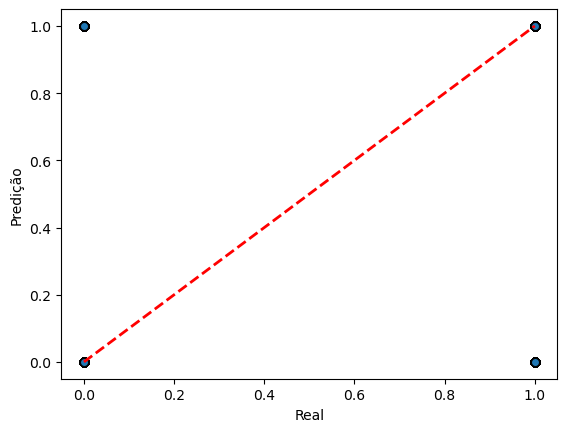

In [36]:
# Classificação usando Perceptron
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

X_treino, y_treino, X_teste, y_teste = dataset_pop_naopop()


per_clf = Perceptron(alpha=0.0001, eta0=0.15, fit_intercept=True,
      max_iter=123, n_jobs=1, penalty=None, random_state=41,
      shuffle=True, tol=None, verbose=0, warm_start=True,
      class_weight={1: 0.3})


per_clf.fit(X_treino, y_treino)
y_pred = per_clf.predict(X_teste)

print('Accurácia: %.2f' % accuracy_score(y_teste, y_pred))

# Avalia o desempenho do modelo treinado
import numpy as np
from sklearn.metrics import classification_report


y_predicao = y_pred
categorias = ['não-popular', 'popular']
# Plota o grafico de resultados
fig, ax = plt.subplots()
ax.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'k--', lw=2, color='red')
ax.scatter(y_teste, y_predicao, edgecolors=(0, 0, 0))
ax.set_xlabel('Real')
ax.set_ylabel('Predição')
plt.show()

In [37]:
report_simples = classification_report(y_teste, y_pred)
print(report_simples)

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1130
           1       0.51      0.49      0.50       715

    accuracy                           0.62      1845
   macro avg       0.59      0.59      0.59      1845
weighted avg       0.61      0.62      0.62      1845



 Classificação utilizando o Multilayer Perceptron

Accuracy: 0.91


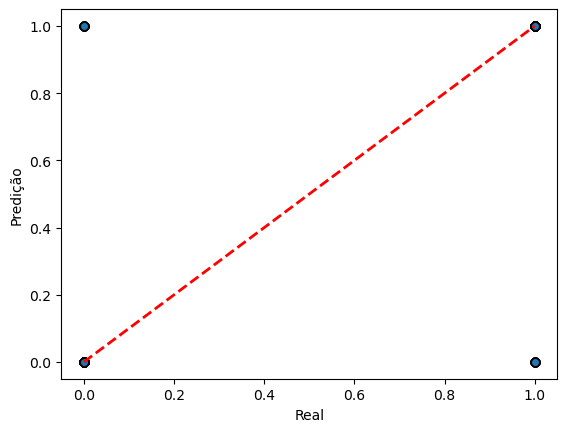

In [38]:
# Classificação usando Perceptron

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

X_treino, y_treino, X_teste, y_teste = dataset_pop_naopop()
X = np.vstack((X_treino, X_teste))

sc = StandardScaler()
sc.fit(X)
mlp_clf = MLPClassifier(warm_start=True, max_iter=500, hidden_layer_sizes=(100,))

X_treino_std = sc.transform(X_treino)
X_teste_std = sc.transform(X_teste)

mlp_clf.fit(X_treino_std, y_treino)
y_pred = mlp_clf.predict(X_teste_std)

print('Accuracy: %.2f' % accuracy_score(y_teste, y_pred))

# Avalia o desempenho do modelo treinado
import numpy as np
from sklearn.metrics import classification_report

y_predicao = y_pred
categorias = ['não-popular', 'popular']
# Plota o grafico de resultados
fig, ax = plt.subplots()
ax.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'k--', lw=2, color='red')
ax.scatter(y_teste, y_predicao, edgecolors=(0, 0, 0))
ax.set_xlabel('Real')
ax.set_ylabel('Predição')
plt.show()

In [39]:
report_multicamadas = classification_report(y_teste, y_pred)
print(report_multicamadas)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1130
           1       0.88      0.88      0.88       715

    accuracy                           0.91      1845
   macro avg       0.91      0.90      0.91      1845
weighted avg       0.91      0.91      0.91      1845



Accuracy: 0.93


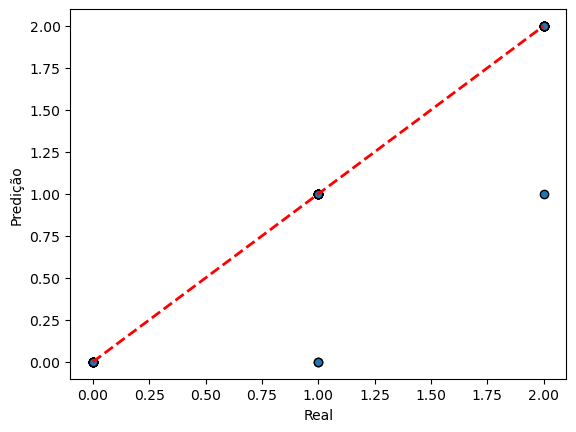

In [40]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Carrega a base de dados
iris = datasets.load_iris()

X = iris.data

y = iris.target

# Divide em treino e teste 
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3)

# Normalização dos dados
sc = StandardScaler()
sc.fit(X)

# Aplica o scaler ao dados de treino X 
X_treino_std = sc.transform(X_treino)

# Aplica o mesmo scaler para os dados de teste
X_teste_std = sc.transform(X_teste)

# Cria um perceptron com os parâmetros: 40 iterations (epochs) sobre os dados
# e learning rate de 0.1
ppn = Perceptron(alpha=0.0001, eta0=0.15, fit_intercept=True,
      max_iter=260, n_jobs=1, penalty=None, random_state=32,
      shuffle=True, tol=None, verbose=0, warm_start=True)

# Treino do perceptron
ppn.fit(X_treino_std, y_treino)

# Aplica o perceptron treinado no dados de teste 
y_predicao = ppn.predict(X_teste_std)

# Exibe a acurácia do modelo
print('Accuracy: %.2f' % accuracy_score(y_teste, y_predicao))

categorias = ['classe 1', 'classe 2', 'classe 3']

# Plota o grafico de resultados
fig, ax = plt.subplots()
ax.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'k--', lw=2, color='red')
ax.scatter(y_teste, y_predicao, edgecolors=(0, 0, 0))
ax.set_xlabel('Real')
ax.set_ylabel('Predição')
plt.show()

Busca Aleatória e Busca em Grid de Hiperparâmetros

In [42]:
# Classificação usando Perceptron

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import loguniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Funcao para exibir os melhores resultados
def melhores_resultados(resultados, n_top=3):
    for i in range(1, n_top + 1):
        candidatos = np.flatnonzero(resultados['rank_test_score'] == i)
        for candidato_i in candidatos:
            print("Modelo top: {0}".format(i))
            print("Escore médio na validação: {0:.3f} (std: {1:.3f})"
                  .format(resultados['mean_test_score'][candidato_i],
                          resultados['std_test_score'][candidato_i]))
            print("Parameters: {0}".format(resultados['params'][candidato_i]))
            print("")

In [43]:
# Preparação dos dados
X_treino, y_treino, X_teste, y_teste = dataset_pop_naopop()
X = np.vstack((X_treino, X_teste))

sc = StandardScaler()
sc.fit(X)
X_treino_std = sc.transform(X_treino)
X_teste_std = sc.transform(X_teste)

# Declaração de um MLP 
mlp_clf = MLPClassifier(warm_start=True, max_iter=100, verbose=True)

In [44]:
# Faixas de busca dos hiperparâmetros
opcoes_parametros = {
    'hidden_layer_sizes': [(30,30,30),(20,80),(25,50,5)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': stats.uniform(0.0001, 0.9),
    'learning_rate': ['constant','adaptive']}

# Busca aleatória
n_iteracoes = 100
random_mlp = RandomizedSearchCV(mlp_clf, 
                                   param_distributions=opcoes_parametros,
                                   n_iter=n_iteracoes)

random_mlp.fit(X_treino_std, y_treino)

Iteration 1, loss = 0.80577187
Iteration 2, loss = 0.77446300
Iteration 3, loss = 0.76156537
Iteration 4, loss = 0.75495745
Iteration 5, loss = 0.75020964
Iteration 6, loss = 0.74634582
Iteration 7, loss = 0.74287112
Iteration 8, loss = 0.73977749
Iteration 9, loss = 0.73704409
Iteration 10, loss = 0.73451140
Iteration 11, loss = 0.73216547
Iteration 12, loss = 0.73002632
Iteration 13, loss = 0.72800606
Iteration 14, loss = 0.72612679
Iteration 15, loss = 0.72430401
Iteration 16, loss = 0.72261544
Iteration 17, loss = 0.72101061
Iteration 18, loss = 0.71952760
Iteration 19, loss = 0.71796131
Iteration 20, loss = 0.71661780
Iteration 21, loss = 0.71525568
Iteration 22, loss = 0.71392984
Iteration 23, loss = 0.71267313
Iteration 24, loss = 0.71144833
Iteration 25, loss = 0.71023582
Iteration 26, loss = 0.70908488
Iteration 27, loss = 0.70797033
Iteration 28, loss = 0.70689908
Iteration 29, loss = 0.70588595
Iteration 30, loss = 0.70485297
Iteration 31, loss = 0.70389235
Iteration 32, los

RandomizedSearchCV(estimator=MLPClassifier(max_iter=100, verbose=True,
                                           warm_start=True),
                   n_iter=100,
                   param_distributions={'activation': ['tanh', 'relu',
                                                       'logistic'],
                                        'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D85AE81BD0>,
                                        'hidden_layer_sizes': [(30, 30, 30),
                                                               (20, 80),
                                                               (25, 50, 5)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam', 'lbfgs']})

Busca Aleatória executou testes com 100 modelos candidatos
Modelo top: 1
Escore médio na validação: 0.907 (std: 0.005)
Parameters: {'activation': 'tanh', 'alpha': 0.13259274601561105, 'hidden_layer_sizes': (30, 30, 30), 'learning_rate': 'constant', 'solver': 'lbfgs'}

Modelo top: 2
Escore médio na validação: 0.901 (std: 0.008)
Parameters: {'activation': 'tanh', 'alpha': 0.6530551926147466, 'hidden_layer_sizes': (30, 30, 30), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}

Modelo top: 3
Escore médio na validação: 0.896 (std: 0.009)
Parameters: {'activation': 'tanh', 'alpha': 0.6694734342893659, 'hidden_layer_sizes': (30, 30, 30), 'learning_rate': 'constant', 'solver': 'lbfgs'}

Acurácia para Busca Aleatória: 0.93
Resultados nos dados de teste:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1130
           1       0.92      0.90      0.91       715

    accuracy                           0.93      1845
   macro avg       0.93     

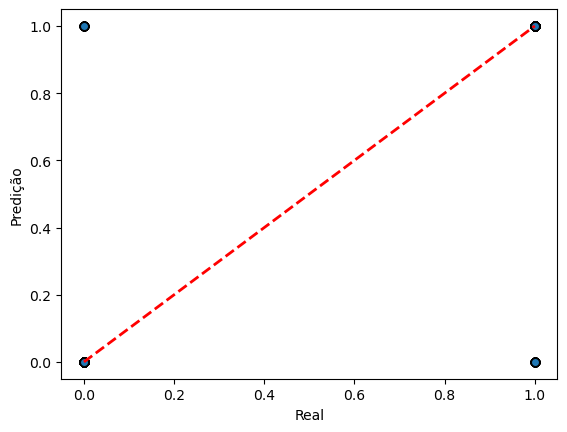

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\monte\OneDrive\Documentos\Jupyter\Lib\site-packages\sklearn\metrics\__init__.py)

In [46]:
print("Busca Aleatória executou testes com {} modelos candidatos".format(n_iteracoes))
melhores_resultados(random_mlp.cv_results_)

# Avaliação na base de testes do melhor modelo gerado
# pela busca aleatória
y_pred = random_mlp.predict(X_teste_std)

print('Acurácia para Busca Aleatória: %.2f' % accuracy_score(y_teste, y_pred))

from sklearn.metrics import classification_report
print('Resultados nos dados de teste:')
print(classification_report(y_teste, y_pred))

# Avalia o desempenho do modelo treinado
import numpy as np
from sklearn.metrics import classification_report

y_predicao = y_pred
categorias = ['não-popular', 'popular']

# Plota o grafico de resultados
fig, ax = plt.subplots()
ax.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'k--', lw=2, color='red')
ax.scatter(y_teste, y_predicao, edgecolors=(0, 0, 0))
ax.set_xlabel('Real')
ax.set_ylabel('Predição')
plt.show()

# Plota matriz de confusao
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(random_mlp, X_teste_std, y_teste,
                                 display_labels=categorias,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
plt.show()